# TOR multi-class classification using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem: mutliclass classification of TOR traffic

Raw data from: ISCX-Tor-2016 [1]

-----------------------------------------------------------------------
[1] Arash Habibi Lashkari et al. Characterization of Tor Traffic using Time based Features. In ICISSP 2017, pages 253–262. SciTePress, 2017.

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [2]:
df = pd.read_csv("../cnsm_final_datasets/tor_multiclass.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,0,216.58.216.142.,10.152.152.11,828,0,461864,0,1.437765e+09,1.437765e+09,...,32615.831626,0.497969,0.572631,0.215905,0.708048,33.910269,4.108293,0.543552,False,AUDIO
1,1,1,10.152.152.11.,216.58.216.142,847,0,74678,0,1.437765e+09,1.437765e+09,...,29684.738594,0.498565,0.592120,0.234305,0.578221,25.364824,2.249503,0.310119,False,AUDIO
2,2,2,10.152.152.11.,173.194.33.97,871,0,108133,0,1.437765e+09,1.437765e+09,...,3140.992232,0.062492,0.473799,0.277916,-0.076864,2.225462,5.307691,-0.129332,False,AUDIO
3,3,3,173.194.33.97.,10.152.152.11,855,0,509135,0,1.437765e+09,1.437765e+09,...,6003.374113,0.711139,0.510666,0.278847,0.008315,5.167634,6.112560,-0.127544,False,AUDIO
4,4,4,10.152.152.11.,74.125.28.189,81,0,17268,0,1.437765e+09,1.437765e+09,...,7820.522820,0.940996,0.581749,0.281770,0.321528,6.800252,12.705158,0.137279,False,AUDIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120791,1311,1311,198.52.200.39.,10.0.2.15,12430,0,6689717,0,1.437768e+09,1.437768e+09,...,24142.132457,0.031103,0.444586,0.320419,-0.333952,25.385595,0.206568,-0.431901,True,VOIP
120792,1312,1312,198.52.200.39.,10.0.2.15,13031,0,7268310,0,1.437768e+09,1.437769e+09,...,30044.784781,0.097656,0.478155,0.320866,0.029524,34.689759,0.221259,-0.082447,True,VOIP
120793,1313,1313,10.0.2.15.,198.52.200.39,16889,0,3854617,0,1.437768e+09,1.437769e+09,...,43381.672901,0.008653,0.445179,0.307234,-0.157668,26.758707,0.023137,-0.640303,True,VOIP
120794,1314,1314,198.52.200.39.,10.0.2.15,1074,0,608083,0,1.437769e+09,1.437769e+09,...,5826.009980,0.129045,0.392288,0.269686,-0.597276,4.102470,0.173548,-0.829831,False,VOIP


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)


def handle_df(df):
    df['LABEL'] = df.LABEL.astype('category')
    df["LABEL_code"] = df["LABEL"].cat.codes

    bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


    for F in features:
        if F in bool_features:
            continue
        if F in distribution_features:
            df.replace([np.inf], 0.5, inplace=True)
            df.replace([-np.inf], 0.5, inplace=True)
            df.loc[df[F].isnull(), F] = 0.5
        elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
            df.replace([np.inf], 0.5, inplace=True)
            df.replace([-np.inf], 0.5, inplace=True)
            df.loc[df[F].isnull(), F] = 0.5
        elif F in frequency_features: 
            df.replace([np.inf], -1, inplace=True)
            df.replace([-np.inf], -1, inplace=True)
            df.loc[df[F].isnull(), F] = -1
        else:
            df.replace([np.inf], 0, inplace=True)
            df.replace([-np.inf], 0, inplace=True)
            df.loc[df[F].isnull(), F] = 0


    for F in bool_features:
        df.loc[df[F].isnull(), F] = False
        df[F] = df[F].astype('bool')
    
    return df

df = handle_df(df)
# df_train = handle_df(df_train)
# df_test = handle_df(df_test)

In [6]:
df

,Unnamed: 0.1,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL,LABEL_code
0,0,0,216.58.216.142.,10.152.152.11,828,0,461864,0,1.437765e+09,1.437765e+09,443,57361,617,273.0,602.693123,363240,-0.011730,60.0,1517.0,60,1520,1460,60,97.681219,553,89.627229,862.836301,0.579710,0.420290,0.924185,2.618248,0.558478,3.685169e-09,3.691861e-09,0.235415,1.600780,3.072657,0.316982,0.691771,True,0.864124,0.123376,0.572893,0.466452,0.830914,138.267585,134.794379,52.199049,220.781038,296.423733,0.358433,0.001376,0.000022,7.800456,0.045950,False,1.649335,True,0.0,0.572893,108143,1.0,False,0,0.0,2.533836e-08,0.238827,0.054943,0.598495,35.214487,175.621522,261583.407037,32615.831626,0.497969,0.572631,0.215905,0.708048,33.910269,4.108293,0.543552,False,AUDIO,0
1,1,1,10.152.152.11.,216.58.216.142,847,0,74678,0,1.437765e+09,1.437765e+09,57361,443,148,60.0,180.360750,32531,0.098552,60.0,161.0,60,1520,1460,60,121.865371,123,83.108108,233.337173,0.747344,0.252656,0.487911,2.129066,2.528605,2.857451e-08,2.862523e-08,-0.742574,10.427841,2.322060,0.238742,0.698451,False,0.560180,0.303281,0.504819,0.466245,0.970953,138.206084,134.793984,52.287782,219.889171,296.423644,0.350383,0.002776,0.000007,7.800557,0.044918,False,0.912530,False,0.0,0.504819,28965,1.0,False,0,0.0,6.372675e-08,0.097962,0.288773,0.598892,19.310592,122.818609,228233.785394,29684.738594,0.498565,0.592120,0.234305,0.578221,25.364824,2.249503,0.310119,False,AUDIO,0
2,2,2,10.152.152.11.,173.194.33.97,871,0,108133,0,1.437765e+09,1.437765e+09,56254,443,184,60.0,282.283545,79684,0.210781,60.0,198.0,60,1520,1460,60,153.414970,162,88.043478,336.903382,0.743972,0.256028,0.439275,1.742928,3.428127,6.584380e-09,6.595744e-09,-0.797101,15.029340,2.657629,0.272116,0.460517,False,0.659239,0.034313,0.550541,0.375514,0.967289,111.241935,92.557258,14.124083,200.482418,296.239266,0.340505,0.006528,0.000005,13.485507,0.025250,False,1.098851,True,0.0,0.550541,78137,1.0,False,0,0.0,1.389817e-02,0.105086,0.192420,0.063088,236.099508,1028.916384,17419.211613,3140.992232,0.062492,0.473799,0.277916,-0.076864,2.225462,5.307691,-0.129332,False,AUDIO,0
3,3,3,173.194.33.97.,10.152.152.11,855,0,509135,0,1.437765e+09,1.437765e+09,443,56254,655,333.0,623.441256,388679,-0.024685,60.0,1257.0,60,1520,1460,60,95.181871,591,90.229008,904.366274,0.560234,0.439766,0.954380,2.617729,0.337829,1.978933e-09,1.982413e-09,0.005848,1.333824,2.845553,0.292158,0.567600,True,0.867391,0.092085,0.550418,0.366058,0.881223,108.201270,75.756004,13.469905,199.423162,295.584786,0.346118,0.002929,0.000018,13.522678,0.025595,False,1.536300,True,0.0,0.550418,180613,1.0,False,0,0.0,8.980974e-05,0.100387,0.839279,0.711735,97.130819,526.574083,30309.061385,6003.374113,0.711139,0.510666,0.278847,0.008315,5.167634,6.112560,-0.127544,False,AUDIO,0
4,4,4,10.152.152.11.,74.125.28.189,81,0,17268,0,1.437765e+09,1.437765e+09,44097,443,273,145.0,301.791319,91078,0.050090,60.0,465.0,60,1056,996,60,110.546271,243,89.010989,40

In [7]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
0,AUDIO,0
3440,BROWSING,1
50987,CHAT,2
51590,FILE_TRANSFER,3
54940,MAIL,4
55395,P2P,5
114901,VIDEO,6
118281,VOIP,7


In [8]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['AUDIO', 'BROWSING', 'CHAT', 'FILE_TRANSFER', 'MAIL', 'P2P', 'VIDEO', 'VOIP']

In [9]:
df = df[["LABEL_code"] + features].copy()

In [10]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [11]:
df.shape

(120796, 74)

In [12]:
df_validation = df.sample(n = 20000)
df_features =  df[~df.isin(df_validation)].dropna()

In [13]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [14]:
X = df[features]
y = df.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [15]:
y_train.value_counts()

5.0    41811
1.0    33469
0.0     2589
6.0     2440
3.0     2407
7.0      996
2.0      500
4.0      345
Name: LABEL_code, dtype: int64

In [16]:
y_test.value_counts()

5.0    17919
1.0    14344
0.0     1109
6.0     1046
3.0     1031
7.0      427
2.0      215
4.0      148
Name: LABEL_code, dtype: int64

In [17]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='weighted')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 30, 4),
        'gamma': hp.uniform ('gamma', 1,4),
        'reg_alpha' : hp.quniform('reg_alpha', 0,200,5),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 2),
        'n_estimators': hp.quniform('n_estimators', 50, 500, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [19]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [38:54<00:00, 23.34s/trial, best loss: -0.9307125269082412]
The best hyperparameters are :  

{'colsample_bytree': 0.5538867630253574, 'gamma': 1.189016388208675, 'max_depth': 16.0, 'min_child_weight': 4.0, 'n_estimators': 350.0, 'reg_alpha': 0.0, 'reg_lambda': 0.15461796835519892}


In [20]:
def XGBoost_classification_tunned_old(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

               precision    recall  f1-score   support

        AUDIO     0.8312    0.6970    0.7582      1109
     BROWSING     0.9209    0.9739    0.9467     14344
         CHAT     0.7283    0.3116    0.4365       215
FILE_TRANSFER     0.9876    0.9243    0.9549      1031
         MAIL     0.9103    0.4797    0.6283       148
          P2P     0.9723    0.9858    0.9790     17919
        VIDEO     0.7015    0.3528    0.4695      1046
         VOIP     0.5613    0.4075    0.4722       427

     accuracy                         0.9393     36239
    macro avg     0.8267    0.6416    0.7057     36239
 weighted avg     0.9337    0.9393    0.9334     36239



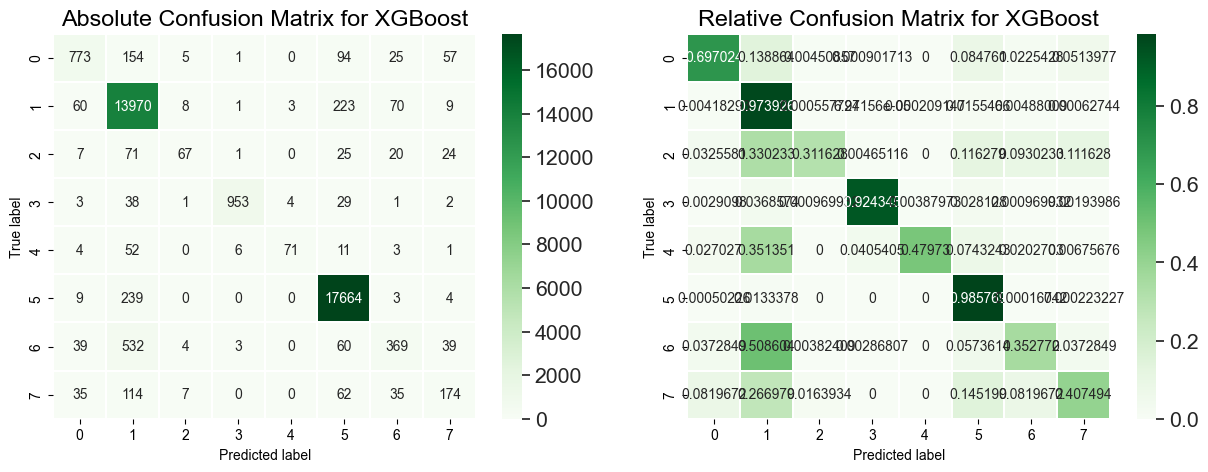

In [21]:
model = XGBoost_classification_tunned_old(best_hyperparams, X_train, X_test, y_train, y_test)

In [22]:

def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        # sm = SMOTE(random_state=100)
        # X_train, y_train = sm.fit_resample(X_train, y_train)
        # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [23]:
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=10)

9
               precision    recall  f1-score   support

        AUDIO     0.7990    0.7312    0.7636       919
     BROWSING     0.9211    0.9753    0.9474     11978
         CHAT     0.8000    0.2652    0.3983       181
FILE_TRANSFER     0.9899    0.9147    0.9508       856
         MAIL     0.9054    0.5360    0.6734       125
          P2P     0.9709    0.9856    0.9782     14956
        VIDEO     0.6787    0.3471    0.4593       870
         VOIP     0.7791    0.3588    0.4913       354

     accuracy                         0.9399     30239
    macro avg     0.8555    0.6392    0.7078     30239
 weighted avg     0.9346    0.9399    0.9334     30239



# Evaluation of model

               precision    recall  f1-score   support

        AUDIO     0.7797    0.7013    0.7384       636
     BROWSING     0.9167    0.9724    0.9437      7887
         CHAT     0.7674    0.3000    0.4314       110
FILE_TRANSFER     0.9928    0.9368    0.9639       585
         MAIL     0.9459    0.4605    0.6195        76
          P2P     0.9700    0.9854    0.9776      9875
        VIDEO     0.6912    0.3356    0.4518       587
         VOIP     0.7522    0.3484    0.4762       244

     accuracy                         0.9372     20000
    macro avg     0.8520    0.6300    0.7003     20000
 weighted avg     0.9315    0.9372    0.9303     20000



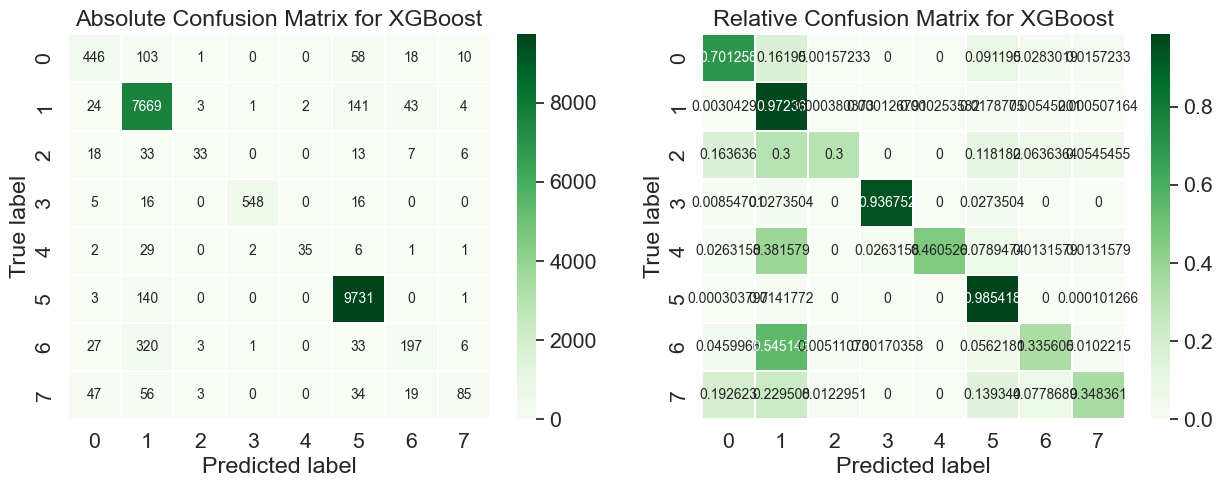

In [24]:
X_test=df_validation[features]  # Features
y_test=df_validation['LABEL_code']  # Labels

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))

matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

In [25]:
report = classification_report(y_test, y_pred, target_names=classifications_array,digits=4)

import csv

problem = "TOR-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
    tmp = report.split("weighted avg")
    tmp_2 = tmp[0].split("macro avg")
    accuracy = tmp_2[0].split("accuracy")[1].split()[0]
    _ = tmp_2[1].split()
    m_precision = _[0]
    m_recall = _[1]
    m_f1 = _[2]
    _ = tmp[1].split()
    w_precision = _[0]
    w_recall = _[1]
    w_f1 = _[2]
    writer.writerow([problem, "-", accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])

# Feature importance

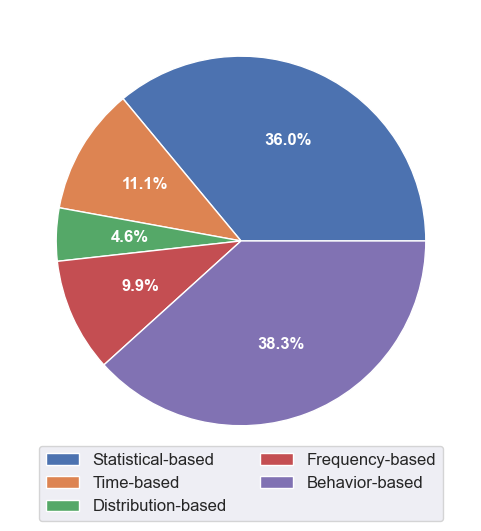

In [26]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_test.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [27]:
data

[0.3393622, 0.1046077, 0.043674424, 0.09366252, 0.36082417]

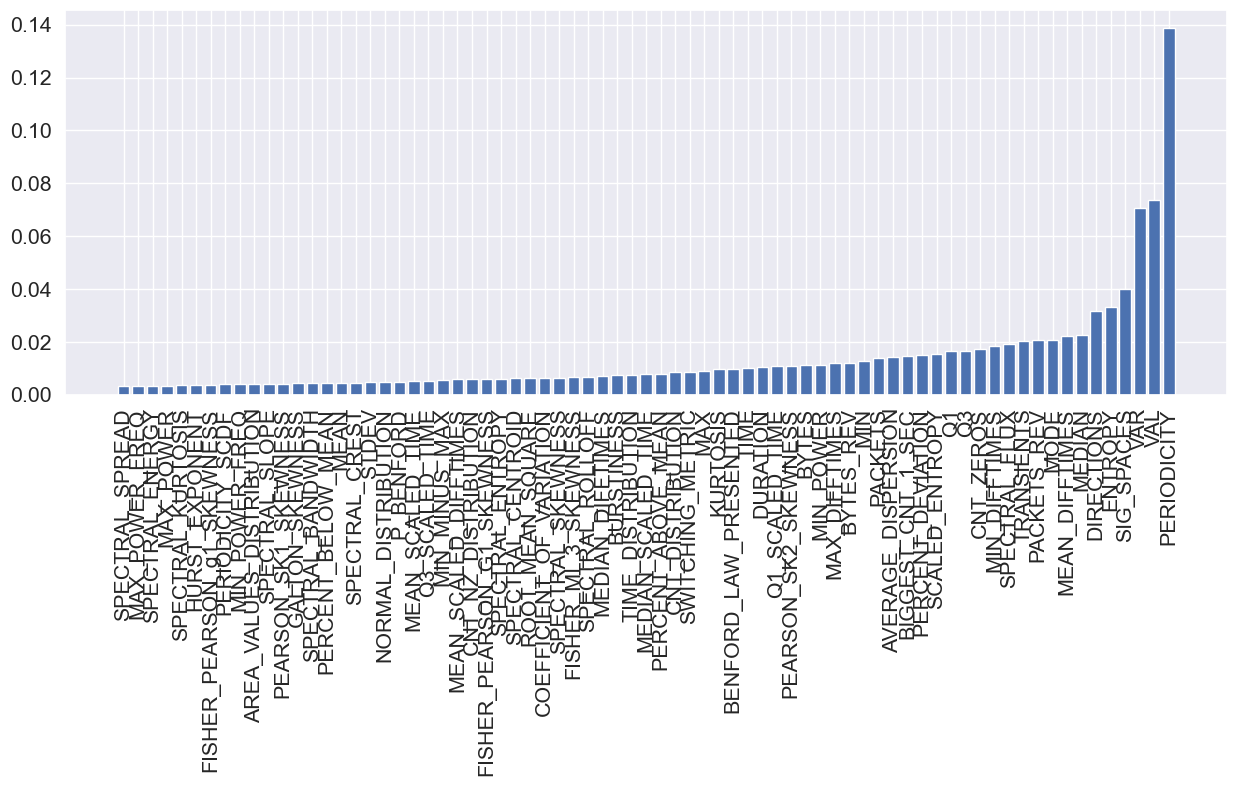

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [29]:
feat_importances

SPECTRAL_SPREAD      0.003138
MAX_POWER_FREQ       0.003239
SPECTRAL_ENERGY      0.003339
MAX_POWER            0.003386
SPECTRAL_KURTOSIS    0.003591
                       ...   
ENTROPY              0.033140
SIG_SPACES           0.040076
VAR                  0.070488
VAL                  0.073811
PERIODICITY          0.138732
Length: 73, dtype: float32

In [30]:
feat_importances.to_dict()

{'SPECTRAL_SPREAD': 0.0031383163295686245,
 'MAX_POWER_FREQ': 0.003239123383536935,
 'SPECTRAL_ENERGY': 0.00333886849693954,
 'MAX_POWER': 0.0033859622199088335,
 'SPECTRAL_KURTOSIS': 0.0035912019666284323,
 'HURST_EXPONENT': 0.003736891085281968,
 'FISHER_PEARSON_g1_SKEWNESS': 0.003757789498195052,
 'PERIODICITY_SCDF': 0.003886051010340452,
 'MIN_POWER_FREQ': 0.003894655266776681,
 'AREA_VALUES_DISTRIBUTION': 0.0040257517248392105,
 'SPECTRAL_SLOPE': 0.004034205339848995,
 'PEARSON_SK1_SKEWNESS': 0.004195309244096279,
 'GALTON_SKEWNESS': 0.004312529228627682,
 'SPECTRAL_BANDWIDTH': 0.0044175186194479465,
 'PERCENT_BELOW_MEAN': 0.0044284095056355,
 'MEAN': 0.004536438267678022,
 'SPECTRAL_CREST': 0.004551375284790993,
 'STDEV': 0.004678890109062195,
 'NORMAL_DISTRIBUTION': 0.004913699813187122,
 'P_BENFORD': 0.004956452175974846,
 'MEAN_SCALED_TIME': 0.00503941485658288,
 'Q3_SCALED_TIME': 0.005299307405948639,
 'MIN_MINUS_MAX': 0.005731610115617514,
 'MEAN_SCALED_DIFFTIMES': 0.0058213

# FEATURE SELECTION

In [35]:
def perform_val(selected_features, cycles = 5, best_hyperparams=None):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(25000), selected_features, verbose=False)
    X_dos=df_features[selected_features]  # Features
    y_dos=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X_dos, y_dos, test_size=0.30, stratify=y_dos) # 70% training and 30% test
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            
    print(F1)

    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    
    report = classification_report(y_validation,y_pred)
    return report

In [37]:
import FEATURE_REDUCTED as FR
REPORTS = []


report = perform_val(FR.botnet_best_features)
REPORTS.append(report)
report = perform_val(FR.doh_best_features)
REPORTS.append(report)
report = perform_val(FR.dos_best_features)
REPORTS.append(report)
report = perform_val(FR.dns_malware_features)
REPORTS.append(report)
report = perform_val(FR.tor_features)
REPORTS.append(report)
report = perform_val(FR.vpn_features)
REPORTS.append(report)
report = perform_val(FR.all_best_features)
REPORTS.append(report)
report = perform_val(FR.combo_features)
REPORTS.append(report)
report = perform_val(FR.combo_2_features)
REPORTS.append(report)
report = perform_val(FR.crypto_features)
REPORTS.append(report)

100%|██████████| 100/100 [09:25<00:00,  5.66s/trial, best loss: -0.8731403544058607]
The best hyperparameters are :  

{'colsample_bytree': 0.6051096058633029, 'gamma': 2.2353897227777386, 'max_depth': 16.0, 'min_child_weight': 0.0, 'n_estimators': 200.0, 'reg_alpha': 0.0, 'reg_lambda': 0.6036309596894849}
0.6198236464922198
100%|██████████| 100/100 [07:54<00:00,  4.74s/trial, best loss: -0.8714482428742292]
The best hyperparameters are :  

{'colsample_bytree': 0.37537542513954464, 'gamma': 2.3712028821142708, 'max_depth': 12.0, 'min_child_weight': 10.0, 'n_estimators': 400.0, 'reg_alpha': 0.0, 'reg_lambda': 0.7472804860645826}
0.6224697119925501
100%|██████████| 100/100 [07:20<00:00,  4.41s/trial, best loss: -0.8787926543536856]
The best hyperparameters are :  

{'colsample_bytree': 0.42905474294262785, 'gamma': 1.5394958003322678, 'max_depth': 4.0, 'min_child_weight': 4.0, 'n_estimators': 400.0, 'reg_alpha': 0.0, 'reg_lambda': 0.9692474537432294}
0.630208325690093
100%|██████████| 1

In [38]:
problem = "TOR-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        tmp = report.split("weighted avg")
        tmp_2 = tmp[0].split("macro avg")
        accuracy = tmp_2[0].split("accuracy")[1].split()[0]
        _ = tmp_2[1].split()
        m_precision = _[0]
        m_recall = _[1]
        m_f1 = _[2]
        _ = tmp[1].split()
        w_precision = _[0]
        w_recall = _[1]
        w_f1 = _[2]
        writer.writerow([problem, f_set, accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])